# Цель:

Для моделей класса ARMA необходимо подобрать параметры, чем мы и займёмся

### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

## Загрузка данных

In [2]:
data = pd.read_excel('Prognozy.xlsx')
data = data.loc[:, data.columns[:2]]

In [3]:
data.head()

,"t, ч","Факт., кВт"
0,0,100
1,1,100
2,2,140
3,3,150
4,4,150


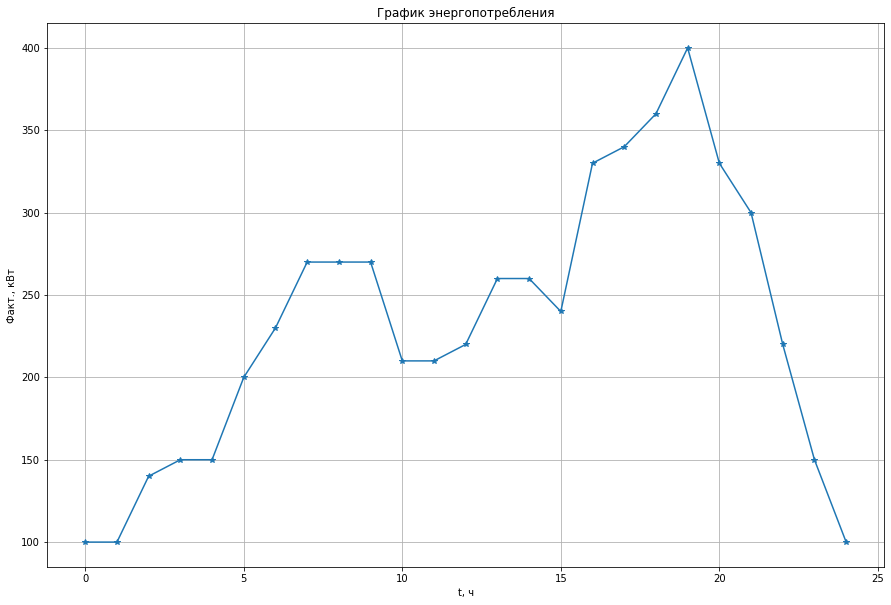

In [4]:
plt.figure(figsize=(15, 10))

plt.title('График энергопотребления')
plt.plot(data['t, ч'], data['Факт., кВт'], marker='*')

plt.xlabel('t, ч')
plt.ylabel('Факт., кВт')
plt.grid()

## Проверяем стационарность ряда

Стационарность — это свойство процесса не менять свои характеристики со временем

In [5]:
print('Достигаемый уровень значимости критерия Дики-Фуллера: %.4f' % adfuller(data['Факт., кВт'])[1])

Достигаемый уровень значимости критерия Дики-Фуллера: 0.1768


Тк данное значение больше 0.05, то *гипотеза о нестационарности* **не может быть отвергнута**

Тогда рассмотрим продифференцированный ряд

In [6]:
print('Достигаемый уровень значимости критерия Дики-Фуллера после дифференцирования 1-го порядка: %.4f' \
      % adfuller((data['Факт., кВт'] - data['Факт., кВт'].shift(1))[1:])[1])

Достигаемый уровень значимости критерия Дики-Фуллера после дифференцирования 1-го порядка: 0.0333


В данном случае гипотеза о нестационарности ряда **отвергается** на уровне значимости **0.05**

Отсюда мы делаем вывод, что параметр **d = 1**

## Построение автокоррелограммы

d:\jupyterparty\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


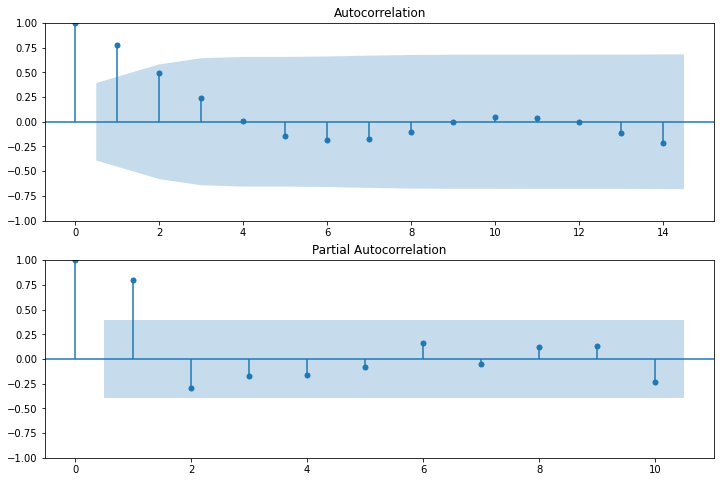

In [7]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Факт., кВт'], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Факт., кВт'], lags=10, ax=ax2)

1) По графику автокорреляции выбираем последний значимый лаг, в данном случае это 1, значит **q = 1**

2) По графику частичной автокорреляции выбираем p, это последний значащий несезонный лаг: **p = 1**

Теперь перебираем различные комбинации p, q и d, в зависимости от параметра AIC

In [8]:
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from scipy.special import inv_boxcox

In [9]:
# model = ARIMA(data['Факт., кВт'], order=(3, 0, 2)).fit()
model_data = data['Факт., кВт']

model_data, lmb = stats.boxcox(model_data)

model = ARIMA(model_data, order=(3, 0, 2)).fit()
print(f"Mocel AIC: {model.aic}")

Mocel AIC: 195.519002126828


In [10]:
start = 4
end = 48

pred = model.predict(start, end)
pred = inv_boxcox(pred, lmb)

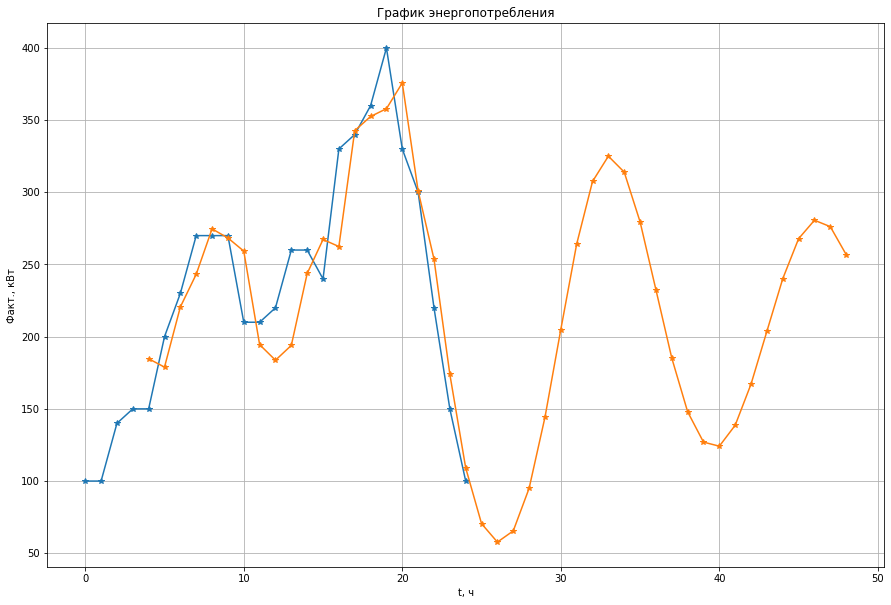

In [11]:
plt.figure(figsize=(15, 10))

plt.title('График энергопотребления')
plt.plot(data['t, ч'], data['Факт., кВт'], marker='*')
plt.plot(list(range(start, end + 1)), pred, marker='*')

plt.xlabel('t, ч')
plt.ylabel('Факт., кВт')
plt.grid()